In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

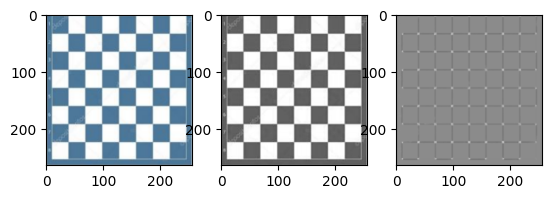

In [ ]:
img = cv2.imread('/content/covua.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corner = cv2.cornerHarris(src = gray, blockSize = 3, ksize = 3, k = 0.04)
plt.subplot(1, 3, 1)
plt.imshow(img)

plt.subplot(1, 3, 2)
plt.imshow(gray,cmap = 'gray')

plt.subplot(1, 3, 3)
plt.imshow(corner, cmap = 'gray')


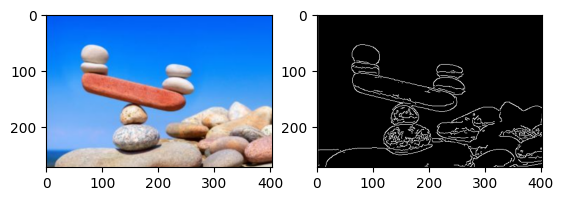

In [ ]:
img = cv2.imread('/content/stone.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,100,200)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap = 'gray')

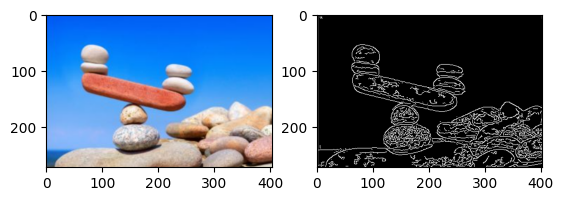

In [ ]:
m = np.median(img)
lower = 0.7 *m
upper = 0.3 *m
edges = cv2.Canny(img, lower,upper)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap = 'gray')

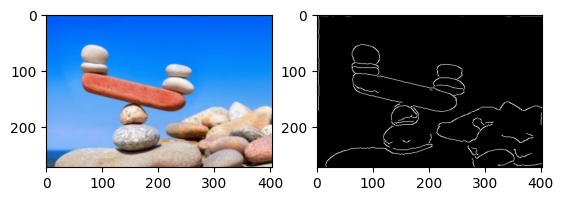

In [ ]:
blur = cv2.blur(img, (5,5))

edges = cv2.Canny(blur,100,200)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap = 'gray')

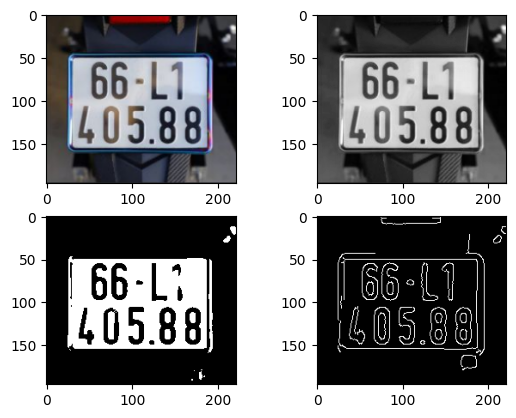

In [ ]:
img = cv2.imread('/content/bienso.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
blur = cv2.blur(img, (5,5))
edges = cv2.Canny(blur,100,200)
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img)
axs[0, 1].imshow(gray, cmap='gray')
axs[1, 0].imshow(threshold, cmap='gray')
axs[1, 1].imshow(edges, cmap='gray')

In [ ]:
img = cv2.imread('/content/cuoi.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresholding = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contour, hierachy = cv2.findContours(thresholding.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

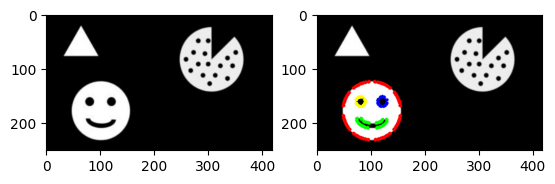

In [ ]:
test = img.copy()
cv2.polylines(test, contour[0], isClosed = True, color = [255,0,0], thickness = 5)
cv2.polylines(test, contour[1], isClosed = True, color = [0,255,0], thickness = 5)
cv2.polylines(test, contour[2], isClosed = True, color = [0,0,255], thickness = 5)
cv2.polylines(test, contour[3], isClosed = True, color = [255,255,0], thickness = 5)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(test)

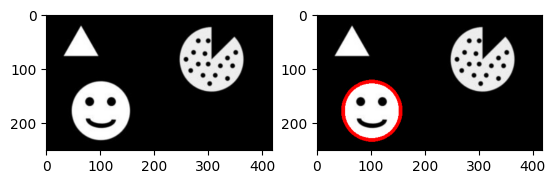

In [ ]:
test = img.copy()
a = cv2.drawContours(test, contour, 0 , color = [255,0,0], thickness =5)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(a)

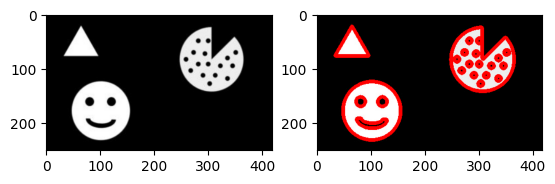

In [ ]:
test = img.copy()
for i in range(len(contour)):
  a = cv2.drawContours(test, contour, i, color = [255,0,0], thickness = 5)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(a)

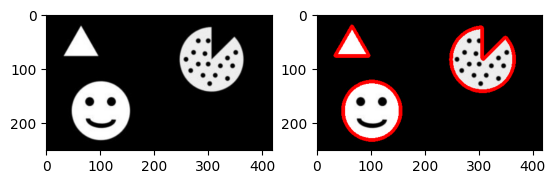

In [ ]:
test = img.copy()
for i in range(len(contour)):
  if hierachy[0][i][3] == -1:
    a = cv2.drawContours(test, contour, i, color = [255,0,0], thickness = 5)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(a)

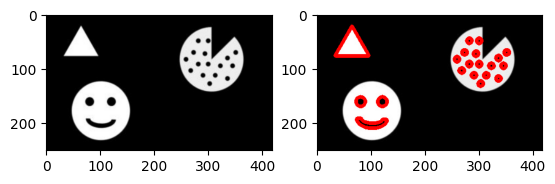

In [ ]:
test = img.copy()
for i in range(len(contour)):
  if hierachy[0][i][2] == -1:
    a = cv2.drawContours(test, contour, i, color = [255,0,0], thickness = 5)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(a)

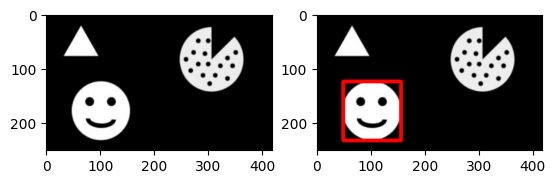

In [ ]:
test = img.copy()
x1,y1,w,h = cv2.boundingRect(contour[0])
a = cv2.rectangle(test, (x1,y1), (x1+w, y1+h), color = [255,0,0], thickness = 5)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(a)

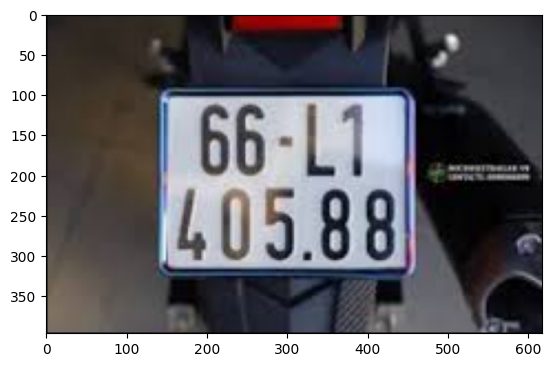

In [ ]:
img=cv2.imread("bienso.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

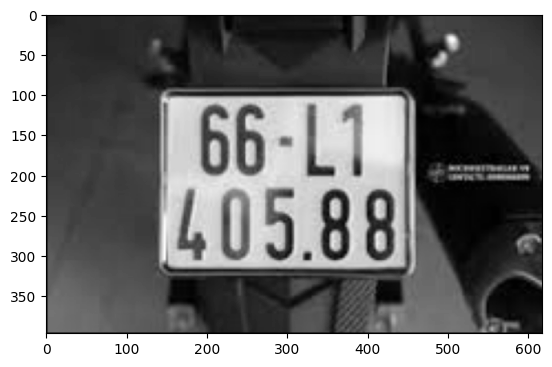

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

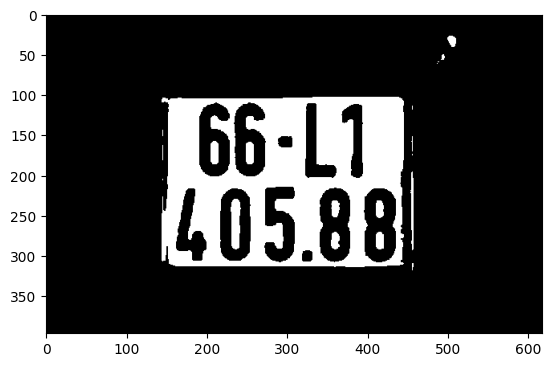

In [ ]:
_,thresh=cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

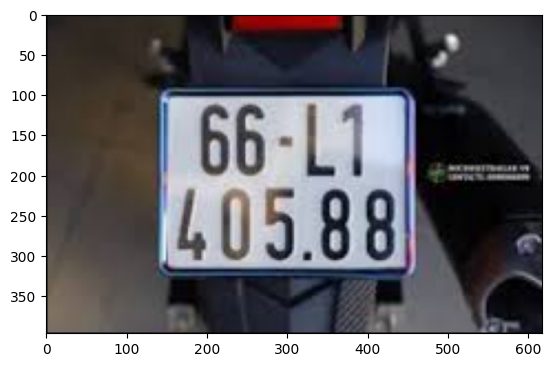

In [ ]:
blur=cv2.medianBlur(thresh,5)
edges=cv2.Canny(blur,100,200)
contour,hierachy=cv2.findContours(thresh.copy(),
                                  cv2.RETR_CCOMP,
                                  cv2.CHAIN_APPROX_SIMPLE)
MAX_w=150
MIN_w=50
test=img.copy()
if len(contour)>0:
  for c in contour:
    x,y,w,h=cv2.boundingRect(c)
    ar=w/h
    if (max(w,h)<MAX_w)and(min(w,h)>MIN_w)and(np.abs(1.0-ar)<0.5):
      cv2.rectangle(test,(x,y),(x+w,y+h),(255,0,0),2)
      break
plt.imshow(test)

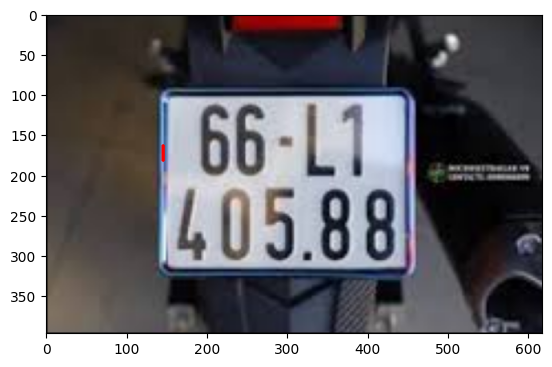

In [ ]:
test=img.copy()
for i in contour:
  x1,y1,w,h=cv2.boundingRect(contour[9])
  cv2.rectangle(test,(x1,y1),(x1+w,y1+h),color=[255,0,0],thickness=2)
plt.imshow(test)

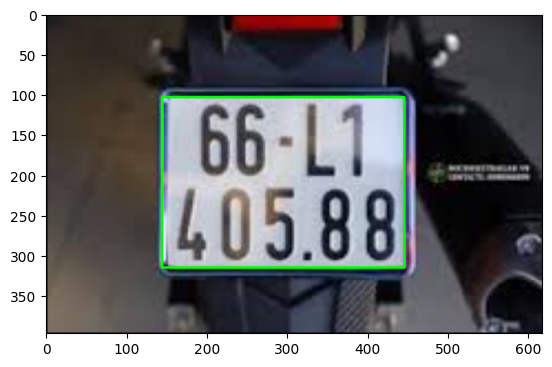

In [ ]:
test=img.copy()
area_cnt=[cv2.contourArea(cnt) for cnt in contour]
area_sort=np.argsort(area_cnt)[::-1]
cnt=contour[area_sort[0]]
x,y,w,h=cv2.boundingRect(cnt)
cv2.rectangle(test,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(test)